## Importing the Libraries

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
%matplotlib inline

## Importing the dataset

In [21]:
df = pd.read_csv('D:/VIT/SEM 4/CSE3008/ML Lab 5/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Exploratory Data Analysis

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Checking correlation between variables

<AxesSubplot:>

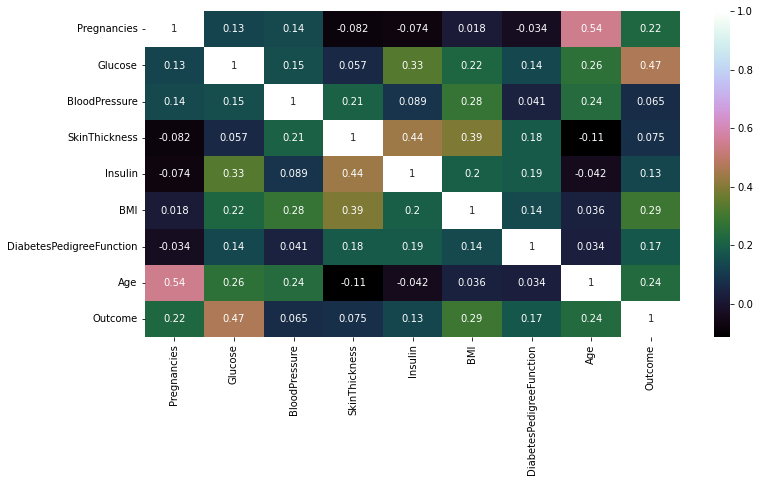

In [23]:
import matplotlib
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True,cmap='cubehelix')

## Plotting variation between different attributes

D:\conda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

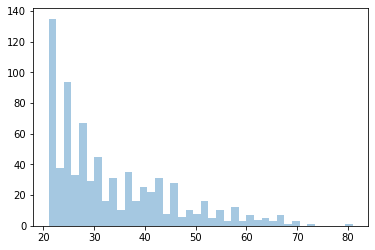

In [24]:
sns.distplot(x=df['Age'],kde=False,bins=40)

<AxesSubplot:ylabel='Density'>

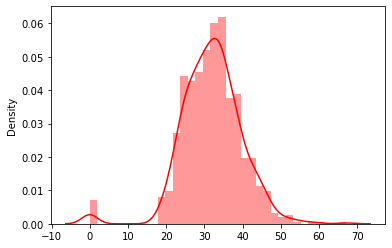

In [25]:
sns.distplot(x=df['BMI'],color='red')

D:\conda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

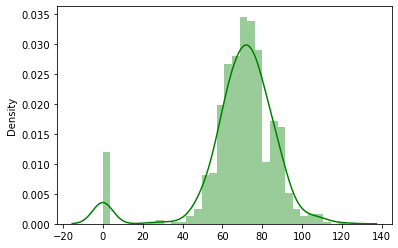

In [26]:
sns.distplot(x=df['BloodPressure'],color='green')

<AxesSubplot:xlabel='SkinThickness', ylabel='Insulin'>

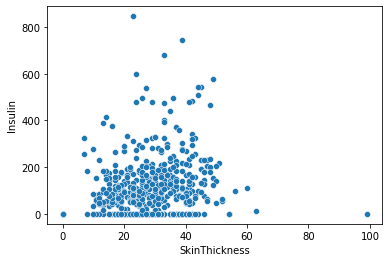

In [27]:
sns.scatterplot(x=df['SkinThickness'],y=df['Insulin'])

<AxesSubplot:xlabel='Glucose', ylabel='Insulin'>

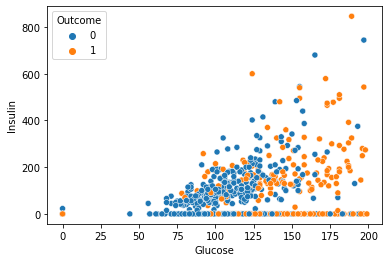

In [28]:
sns.scatterplot(x=df['Glucose'],y=df['Insulin'],hue=df['Outcome'])

<AxesSubplot:xlabel='BMI', ylabel='BloodPressure'>

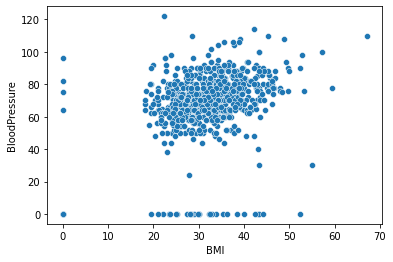

In [29]:
sns.scatterplot(x=df['BMI'],y=df['BloodPressure'])

<AxesSubplot:xlabel='Glucose', ylabel='BloodPressure'>

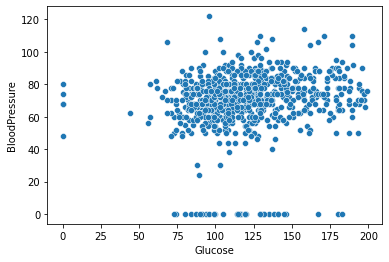

In [30]:
sns.scatterplot(x=df['Glucose'],y=df['BloodPressure'])

## Checking for null values

In [31]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Dividing dataset into Independent and Dependent variable

In [32]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

## Dividing dataset into Train and test set

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Feature Scaling

In [34]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training Logistic Regression Model

In [35]:
classifier1 = LogisticRegression(random_state = 0)
classifier1.fit(X_train, y_train)

LogisticRegression(random_state=0)

## Checking accuracy of the model

In [36]:
y_pred1 = classifier1.predict(X_test)
cm1 = confusion_matrix(y_test, y_pred1)
print(cm1)
print(accuracy_score(y_test, y_pred1))

[[98  9]
 [18 29]]
0.8246753246753247
